# trial 마다 10s 히트맵 그리기 

In [1]:
import pandas as pd
from datetime import datetime

data = pd.read_excel('./clean_dataset/session_5_clean.xlsx') # stimulus 시점 표시된 clean data 가져오기.
data

,Unnamed: 0,TimeStamp,Delta_AF8,Theta_AF8,Alpha_AF8,Beta_AF8,Gamma_AF8,stimulus
0,0,2022-07-22 16:47:05.270,0.653585,0.779724,0.756711,0.682772,0.091385,0
1,1,2022-07-22 16:47:05.271,0.653585,0.779724,0.756711,0.682772,0.091385,0
2,2,2022-07-22 16:47:05.271,0.653585,0.779724,0.756711,0.682772,0.091385,0
3,3,2022-07-22 16:47:05.271,0.653585,0.779724,0.756711,0.682772,0.091385,0
4,4,2022-07-22 16:47:05.272,0.653585,0.779724,0.756711,0.682772,0.091385,0
...,...,...,...,...,...,...,...,...
67255,67305,2022-07-22 16:51:27.944,0.756288,0.337619,0.567640,0.647005,0.448585,0
67256,67306,2022-07-22 16:51:27.945,0.756288,0.337619,0.567640,0.647005,0.448585,0
67257,67307,2022-07-22 16:51:27.945,0.756288,0.337619,0.567640,0.647005,0.448585,0
67258,67308,2022-07-22 16:51:27.945,0.756288,0.337619,0.567640,0.647005,0.448585,0


In [2]:
data = data.drop('Unnamed: 0', axis = 1)
data.head()

,TimeStamp,Delta_AF8,Theta_AF8,Alpha_AF8,Beta_AF8,Gamma_AF8,stimulus
0,2022-07-22 16:47:05.270,0.653585,0.779724,0.756711,0.682772,0.091385,0
1,2022-07-22 16:47:05.271,0.653585,0.779724,0.756711,0.682772,0.091385,0
2,2022-07-22 16:47:05.271,0.653585,0.779724,0.756711,0.682772,0.091385,0
3,2022-07-22 16:47:05.271,0.653585,0.779724,0.756711,0.682772,0.091385,0
4,2022-07-22 16:47:05.272,0.653585,0.779724,0.756711,0.682772,0.091385,0


In [3]:
# 자극 시점 index 저장 (맨앞, 맨뒤 인덱스 포함)
point = []
point.append(0)
for i in range(len(data)) :
    if data['stimulus'][i] == 1:
        point.append(i)
point.append(len(data))
point

[0,
 8172,
 10980,
 13811,
 16620,
 19440,
 29939,
 32748,
 35569,
 38376,
 41196,
 51696,
 54504,
 57324,
 60144,
 62952,
 67260]

# whole heatmap 그리기

In [7]:
start_idx = point[1]+256 # 수정 # 5 배수에서는 개수 맞춰주기 +2830  //+1024(4초)
end_idx = point[1]+1024 # 수정
data_h = data[start_idx:end_idx]
data_alpha = data_h.drop(['stimulus','TimeStamp','Delta_AF8','Theta_AF8','Gamma_AF8','Beta_AF8',], axis = 1)
data_beta = data_h.drop(['stimulus','TimeStamp','Delta_AF8','Theta_AF8','Gamma_AF8','Alpha_AF8',], axis = 1)

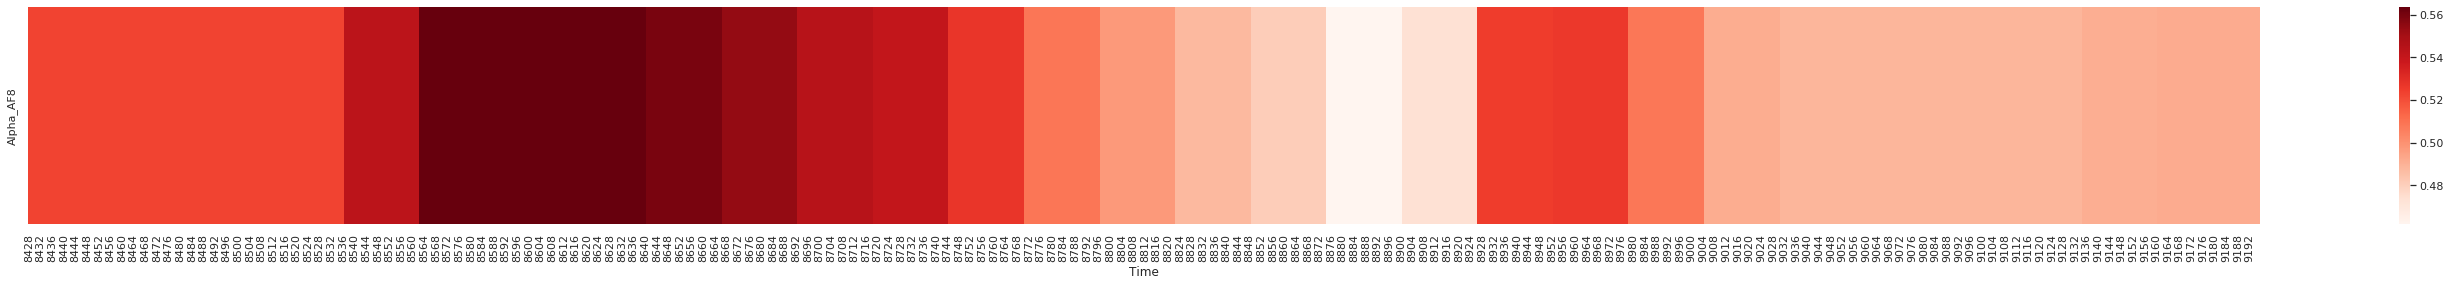

In [8]:
from pandas import Series, DataFrame


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_h_T = data_alpha.transpose()
# xtime = [0,' ',' ',' ',' ',' ',' ',' ',' ',' ',' ', ' ',0.5,' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',1]

sns.set(rc = {'figure.figsize':(50,4)})
# ax=sns.heatmap(data_h_T, cmap='Reds', annot=True,xticklabels=xtime)
ax=sns.heatmap(data_h_T, cmap='Reds', annot=False)
plt.xlabel("Time")

sfig = ax.get_figure()
# sfig.savefig('./분석 시각화/알파베타 히트맵/session 2_AF8/4s/trial15_alpha.png',  orientation="landscape") # 수정
# sfig.savefig('./분석 시각화/t.png',  orientation="landscape") # 수정

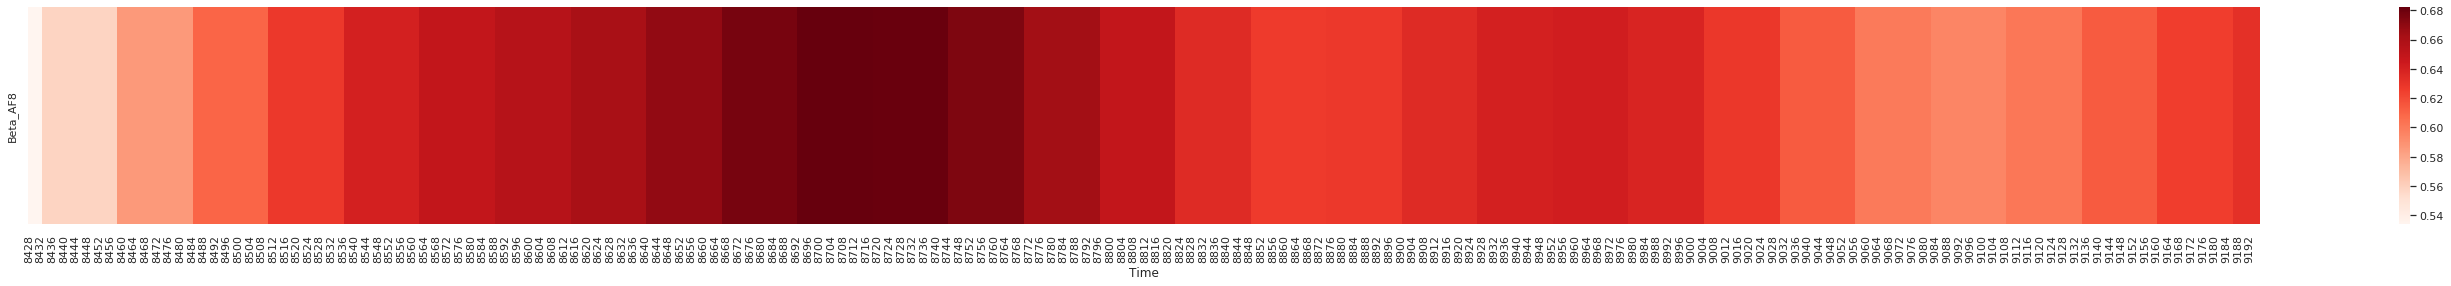

In [9]:
from pandas import Series, DataFrame


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_h_T = data_beta.transpose() 


# xtime = [0,' ',' ',' ',' ',' ',' ',' ',' ',' ',' ', ' ',0.5,' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',1]

sns.set(rc = {'figure.figsize':(50,4)})
# ax=sns.heatmap(data_h_T, cmap='Reds', annot=True,xticklabels=xtime)
ax=sns.heatmap(data_h_T, cmap='Reds', annot=False)
plt.xlabel("Time")

sfig = ax.get_figure()
# sfig.savefig('./분석 시각화/알파베타 히트맵/session 2_AF8/4s/trial15_beta.png',  orientation="landscape") # 수정

In [ ]:
# 평균 내서 히트맵

In [59]:
point

[0,
 7752,
 10572,
 13380,
 16212,
 19020,
 29520,
 32340,
 35149,
 37968,
 40776,
 51276,
 54084,
 56916,
 59724,
 62544,
 66960]

In [69]:
# 빈 데이터프레임 생성. (ratio 저장할거)
df_alpha = pd.DataFrame()

In [74]:
df_alpha

,3,1
0,0.256436,-0.046531
1,0.256436,-0.046531
2,0.256436,-0.046531
3,0.256436,-0.046531
4,0.256436,-0.046531
...,...,...
1019,0.435590,0.603363
1020,0.435590,0.603363
1021,0.435590,0.603363
1022,0.435590,0.603363


In [73]:
start_idx = point[1] # 수정 # 5 배수에서는 개수 맞춰주기 +2830  //+1024(4초)
end_idx = point[1]+1024 # 수정
data_h = data[start_idx:end_idx]
data_alpha = data_h.drop(['stimulus','TimeStamp','Delta_AF8','Theta_AF8','Gamma_AF8','Beta_AF8',], axis = 1)
data_beta = data_h.drop(['stimulus','TimeStamp','Delta_AF8','Theta_AF8','Gamma_AF8','Alpha_AF8',], axis = 1)
df_alpha['1'] = data_alpha['Alpha_AF8'].reset_index(drop=True)

In [79]:
# 빈 데이터프레임 생성. (ratio 저장할거)
df_alpha = pd.DataFrame()
df_beta = pd.DataFrame()
for i in range(1, 16) :
    start_idx = point[i] # 수정 # 5 배수에서는 개수 맞춰주기 +2830  //+1024(4초)
    end_idx = point[i]+1024 # 수정
    data_h = data[start_idx:end_idx]
    data_alpha = data_h.drop(['stimulus','TimeStamp','Delta_AF8','Theta_AF8','Gamma_AF8','Beta_AF8',], axis = 1)
    data_beta = data_h.drop(['stimulus','TimeStamp','Delta_AF8','Theta_AF8','Gamma_AF8','Alpha_AF8',], axis = 1)
    df_alpha['trial'+ str(i)] = data_alpha['Alpha_AF8'].reset_index(drop=True)
    df_beta['trial'+ str(i)] = data_beta['Beta_AF8'].reset_index(drop=True)    

In [81]:
df_beta

,trial1,trial2,trial3,trial4,trial5,trial6,trial7,trial8,trial9,trial10,trial11,trial12,trial13,trial14,trial15
0,0.762741,0.653042,0.681060,0.543648,0.466507,0.742425,0.531294,0.484183,0.355783,0.471524,0.478551,0.513367,0.407120,0.420700,0.457252
1,0.762741,0.653042,0.681060,0.543648,0.466507,0.742425,0.531294,0.484183,0.355783,0.471524,0.478551,0.513367,0.407120,0.420700,0.457252
2,0.762741,0.653042,0.681060,0.543648,0.466507,0.742425,0.531294,0.484183,0.355783,0.471524,0.478551,0.513367,0.407120,0.420700,0.457252
3,0.762741,0.653042,0.681060,0.543648,0.466507,0.742425,0.531294,0.484183,0.355783,0.471524,0.478551,0.513367,0.407120,0.420700,0.457252
4,0.762741,0.653042,0.681060,0.543648,0.466507,0.742425,0.531294,0.484183,0.355783,0.471524,0.478551,0.513367,0.407120,0.420700,0.457252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0.638313,0.711828,0.659012,0.656969,0.487156,0.693577,0.517465,0.628954,0.574277,0.435647,0.553548,0.514500,0.378828,0.509672,0.406820
1020,0.638313,0.711828,0.659012,0.656969,0.487156,0.693577,0.517465,0.628954,0.574277,0.435647,0.553548,0.514500,0.378828,0.509672,0.406820
1021,0.638313,0.711828,0.659012,0.656969,0.487156,0.693577,0.517465,0.628954,0.574277,0.435647,0.553548,0.514500,0.378828,0.509672,0.406820
1022,0.638313,0.711828,0.659012,0.656969,0.487156,0.693577,0.517465,0.628954,0.574277,0.435647,0.553548,0.514500,0.378828,0.509672,0.406820


In [101]:
df_alpha

,trial1,trial2,trial3,trial4,trial5,trial6,trial7,trial8,trial9,trial10,trial11,trial12,trial13,trial14,trial15
0,-0.046531,0.256436,0.624267,0.480761,0.106639,0.151283,0.273739,-0.052845,0.497603,0.025916,0.102305,0.401152,0.356388,0.382422,0.381085
1,-0.046531,0.256436,0.624267,0.480761,0.106639,0.151283,0.273739,-0.052845,0.497603,0.025916,0.102305,0.401152,0.356388,0.382422,0.381085
2,-0.046531,0.256436,0.624267,0.480761,0.106639,0.151283,0.273739,-0.052845,0.497603,0.025916,0.102305,0.401152,0.356388,0.382422,0.381085
3,-0.046531,0.256436,0.624267,0.480761,0.106639,0.151283,0.273739,-0.052845,0.497603,0.025916,0.102305,0.401152,0.356388,0.382422,0.381085
4,-0.046531,0.256436,0.624267,0.480761,0.106639,0.151283,0.273739,-0.052845,0.497603,0.025916,0.102305,0.401152,0.356388,0.382422,0.381085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0.603363,0.435590,0.482827,0.407623,0.522082,0.288417,0.352501,0.391114,0.331362,0.156447,0.324996,0.140237,0.060976,0.425722,0.482273
1020,0.603363,0.435590,0.482827,0.407623,0.522082,0.288417,0.352501,0.391114,0.331362,0.156447,0.324996,0.140237,0.060976,0.425722,0.482273
1021,0.603363,0.435590,0.482827,0.407623,0.522082,0.288417,0.352501,0.391114,0.331362,0.156447,0.324996,0.140237,0.060976,0.425722,0.482273
1022,0.603363,0.435590,0.482827,0.407623,0.522082,0.288417,0.352501,0.391114,0.331362,0.156447,0.324996,0.140237,0.060976,0.425722,0.482273


In [89]:
df_beta['sum'] = df_beta.sum(axis = 'columns')

In [103]:
df_alpha['sum'] = df_alpha.sum(axis = 'columns')

In [92]:
df_beta['sum']

0       7.969196
1       7.969196
2       7.969196
3       7.969196
4       7.969196
          ...   
1019    8.366566
1020    8.366566
1021    8.366566
1022    8.366566
1023    8.366566
Name: sum, Length: 1024, dtype: float64

In [94]:
new = df_beta[['sum']].copy()

In [104]:
new_alpha = df_alpha[['sum']].copy()

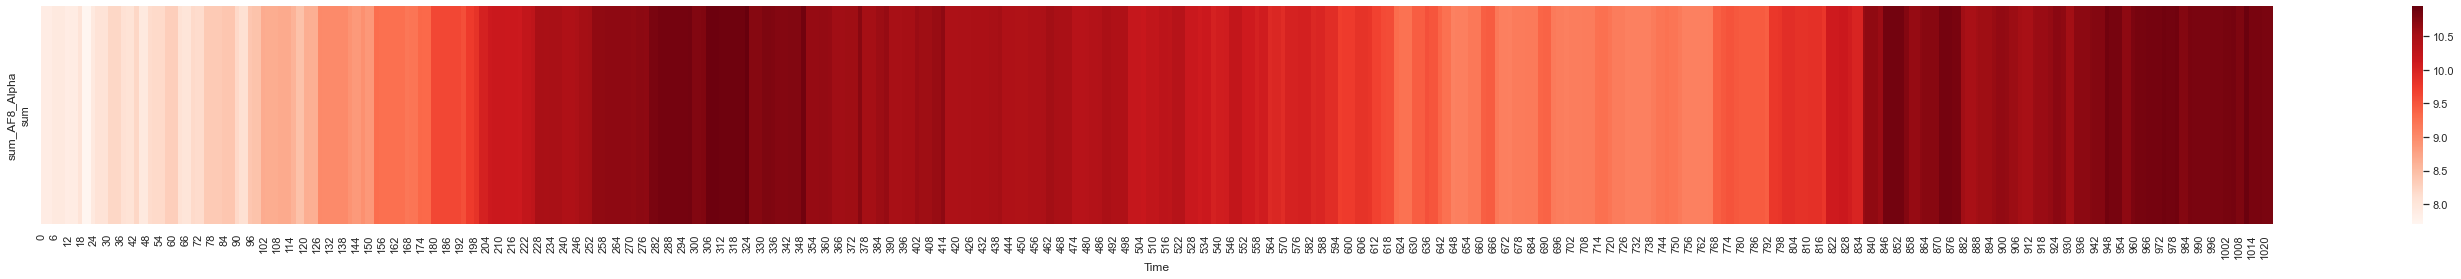

In [105]:
from pandas import Series, DataFrame


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# xtime = [0,' ',' ',' ',' ',' ',' ',' ',' ',' ',' ', ' ',0.5,' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',1]

sns.set(rc = {'figure.figsize':(50,4)})
# ax=sns.heatmap(data_h_T, cmap='Reds', annot=True,xticklabels=xtime)
ax=sns.heatmap(new_alpha.transpose(), cmap='Reds', annot=False)
plt.xlabel("Time")
plt.ylabel("sum_AF8_Alpha")

sfig = ax.get_figure()
# sfig.savefig('./분석 시각화/알파베타 히트맵/session 2_AF8/4s/trial15_beta.png',  orientation="landscape") # 수정
sfig.savefig('./분석 시각화/알파베타 히트맵/session 2_AF8/4s/전체sum_alpha.png',  orientation="landscape") # 수정

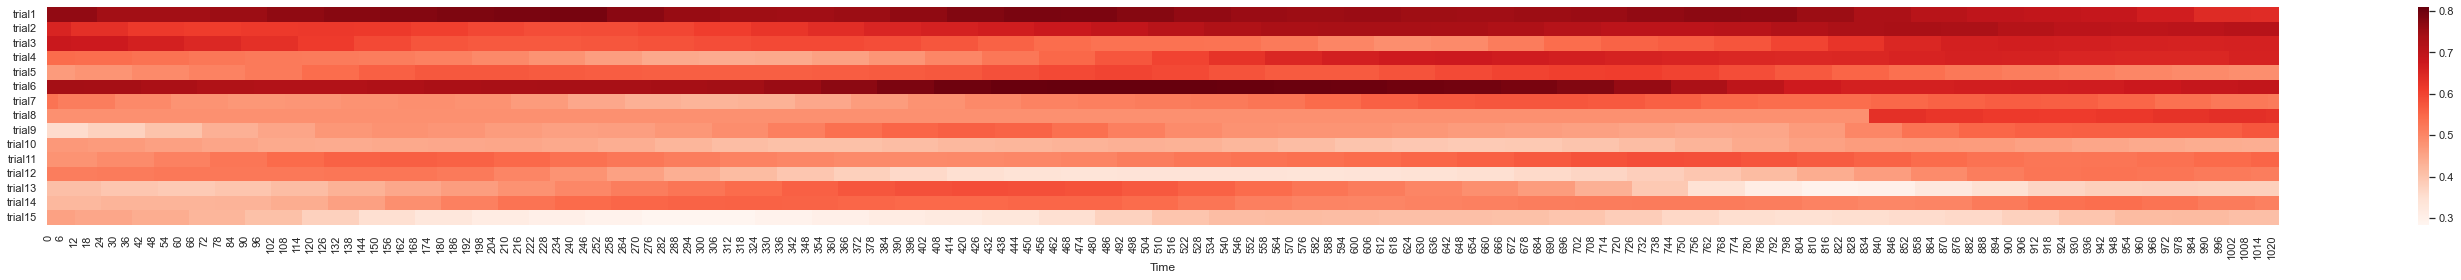

In [87]:
from pandas import Series, DataFrame


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# xtime = [0,' ',' ',' ',' ',' ',' ',' ',' ',' ',' ', ' ',0.5,' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',1]

# sns.set(rc = {'figure.figsize':(50,4)})
# ax=sns.heatmap(data_h_T, cmap='Reds', annot=True,xticklabels=xtime)
ax=sns.heatmap(df_beta.transpose(), cmap='Reds', annot=False)
plt.xlabel("Time")

sfig = ax.get_figure()
# sfig.savefig('./분석 시각화/알파베타 히트맵/session 2_AF8/4s/trial15_beta.png',  orientation="landscape") # 수정

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize = (50,8))
plt.plot(df_beta.drop('sum'))
plt.show()

KeyError: "['sum'] not found in axis"

<Figure size 3600x576 with 0 Axes>

In [78]:
df_beta

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.762741,0.653042,0.681060,0.543648,0.466507,0.742425,0.531294,0.484183,0.355783,0.471524,0.478551,0.513367,0.407120,0.420700,0.457252
1,0.762741,0.653042,0.681060,0.543648,0.466507,0.742425,0.531294,0.484183,0.355783,0.471524,0.478551,0.513367,0.407120,0.420700,0.457252
2,0.762741,0.653042,0.681060,0.543648,0.466507,0.742425,0.531294,0.484183,0.355783,0.471524,0.478551,0.513367,0.407120,0.420700,0.457252
3,0.762741,0.653042,0.681060,0.543648,0.466507,0.742425,0.531294,0.484183,0.355783,0.471524,0.478551,0.513367,0.407120,0.420700,0.457252
4,0.762741,0.653042,0.681060,0.543648,0.466507,0.742425,0.531294,0.484183,0.355783,0.471524,0.478551,0.513367,0.407120,0.420700,0.457252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0.638313,0.711828,0.659012,0.656969,0.487156,0.693577,0.517465,0.628954,0.574277,0.435647,0.553548,0.514500,0.378828,0.509672,0.406820
1020,0.638313,0.711828,0.659012,0.656969,0.487156,0.693577,0.517465,0.628954,0.574277,0.435647,0.553548,0.514500,0.378828,0.509672,0.406820
1021,0.638313,0.711828,0.659012,0.656969,0.487156,0.693577,0.517465,0.628954,0.574277,0.435647,0.553548,0.514500,0.378828,0.509672,0.406820
1022,0.638313,0.711828,0.659012,0.656969,0.487156,0.693577,0.517465,0.628954,0.574277,0.435647,0.553548,0.514500,0.378828,0.509672,0.406820


# index 번호로 timestamp 확인하기

In [38]:
data['TimeStamp'][7821]

'2022-07-17 22:14:48.291'

# 라인 그래프 그리기

No handles with labels found to put in legend.


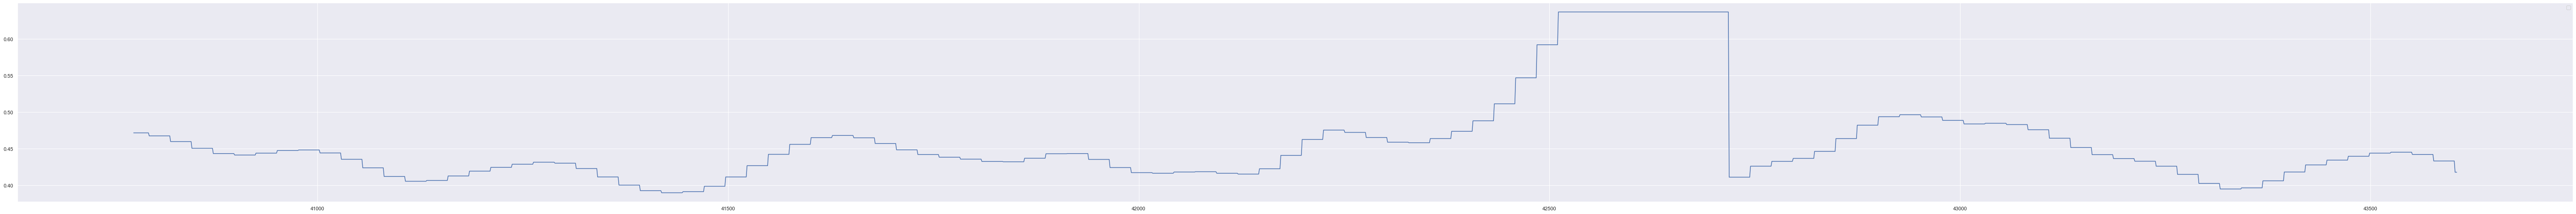

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize = (100,8))
plt.plot(data_beta)
plt.legend()
plt.show()